In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

<Axes: >

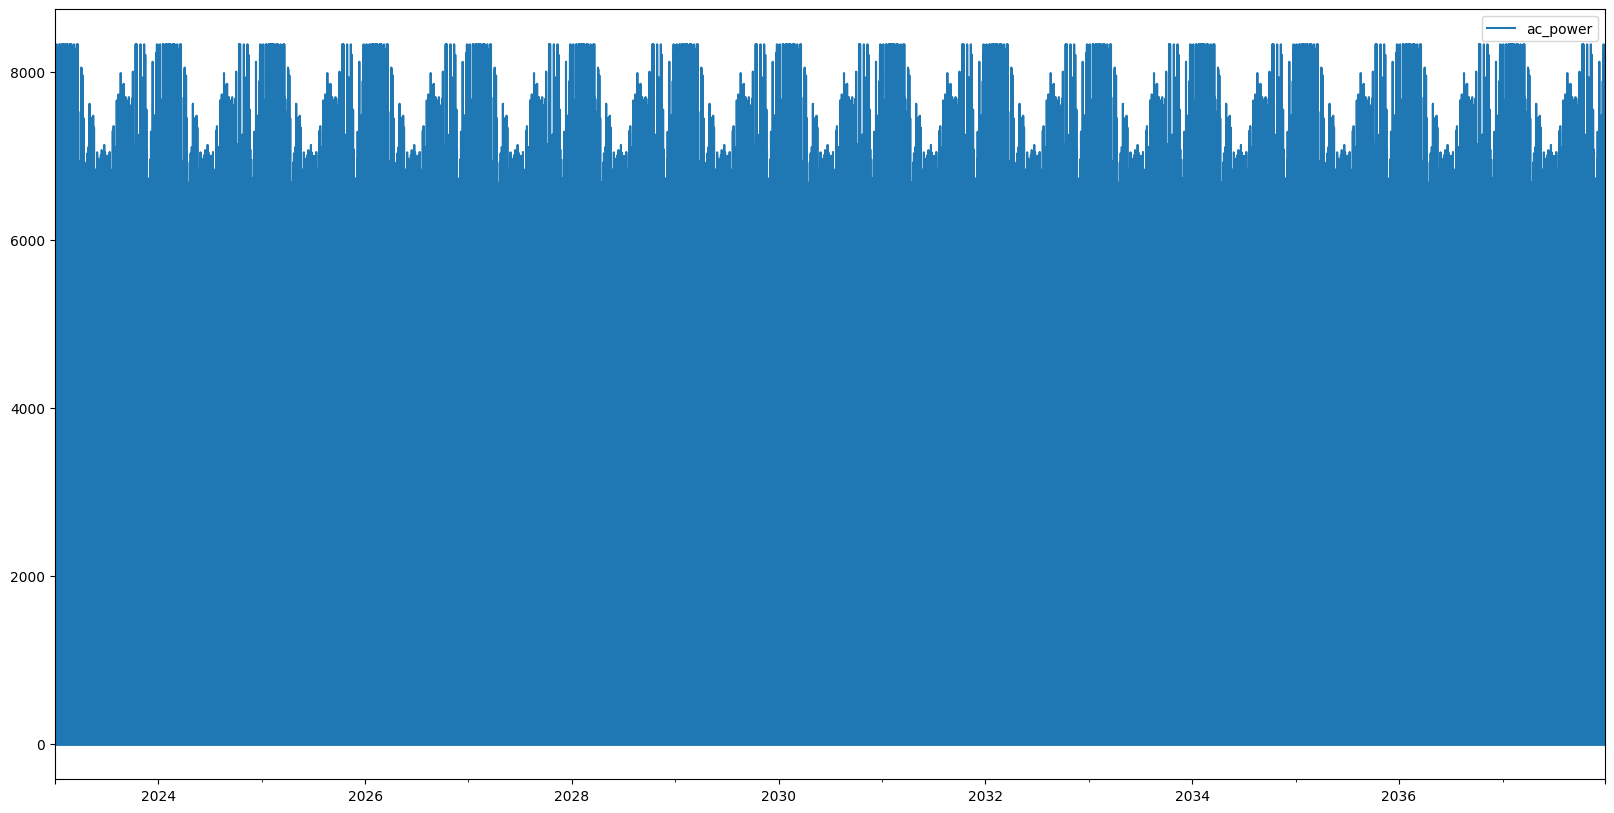

In [2]:
# Load a output and extrapolate it to 15years

with open("data/pvwatts/raw/system_capacity10_module_type0_array_type0_tilt10.json") as f:
    hourly_data = json.load(f)["outputs"]["ac"]
    df = pd.DataFrame(
            index = pd.date_range(start="01/01/2023", freq="H", periods=365*24*15, inclusive="both"),
            data={"ac_power" : hourly_data*15}
                ) 
    
df.plot(kind="line", figsize=(20,10))

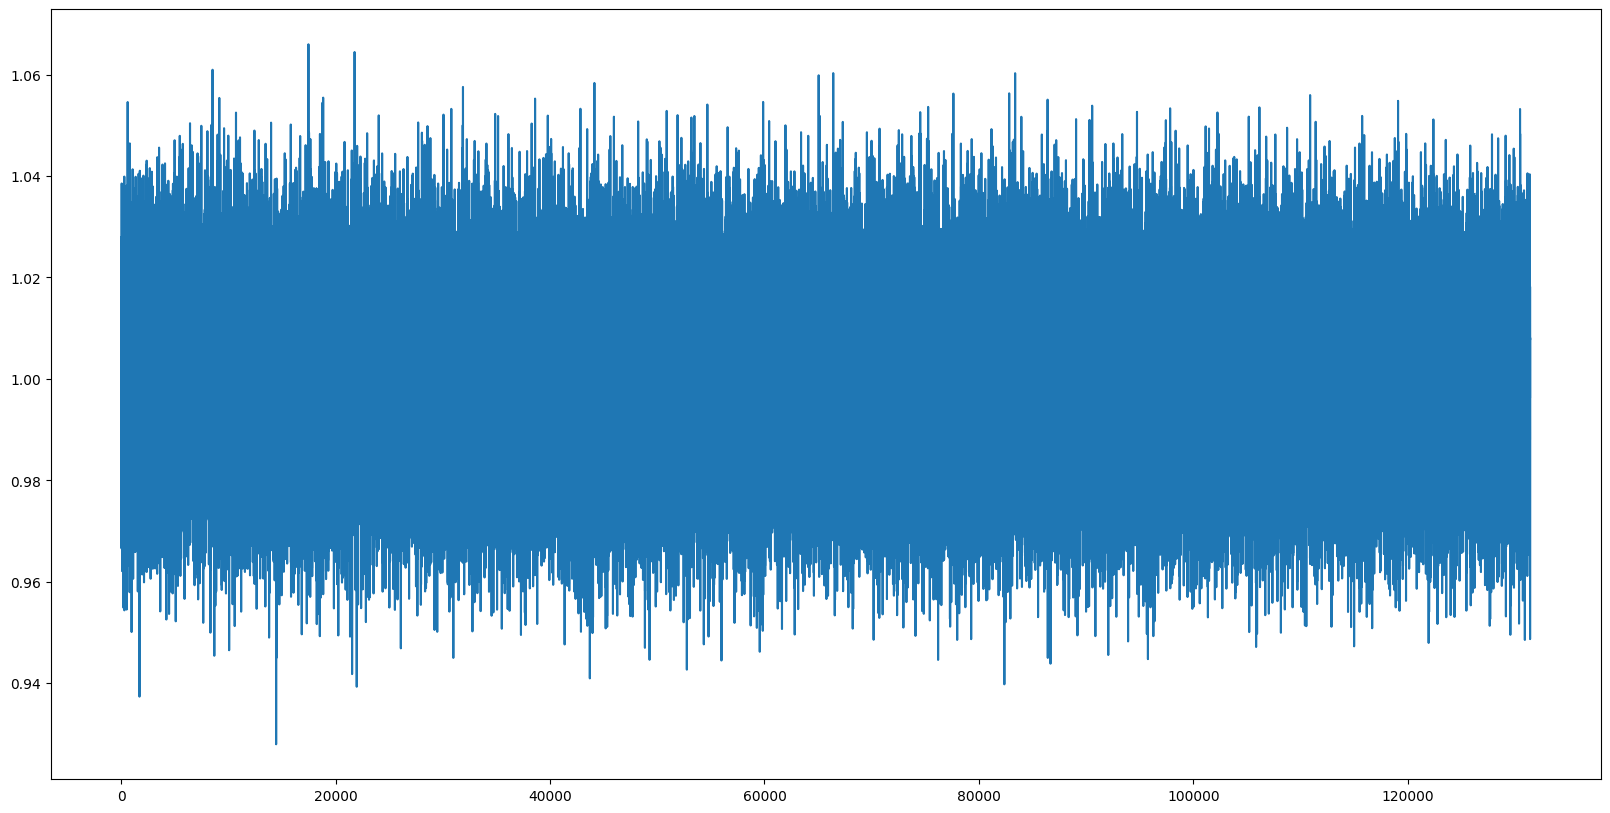

In [3]:
noise = np.random.normal(loc=1.0, scale=0.015, size=len(df))

plt.figure(figsize=(20, 10))
plt.plot(noise)

In [4]:
# Create the degradation factor
degradation_factor = np.linspace(start=1.0, stop=(0.995**15), num=len(df))

In [5]:
for i in [df, noise, degradation_factor]:
    print(len(i))

131400
131400
131400


In [6]:
raw_dir = Path("data/pvwatts/raw/")
interim_dir = Path("data/pvwatts/interim/")

degradation_factor = np.linspace(start=1.0, stop=(0.995**15), num=365*24*15)


<Axes: >

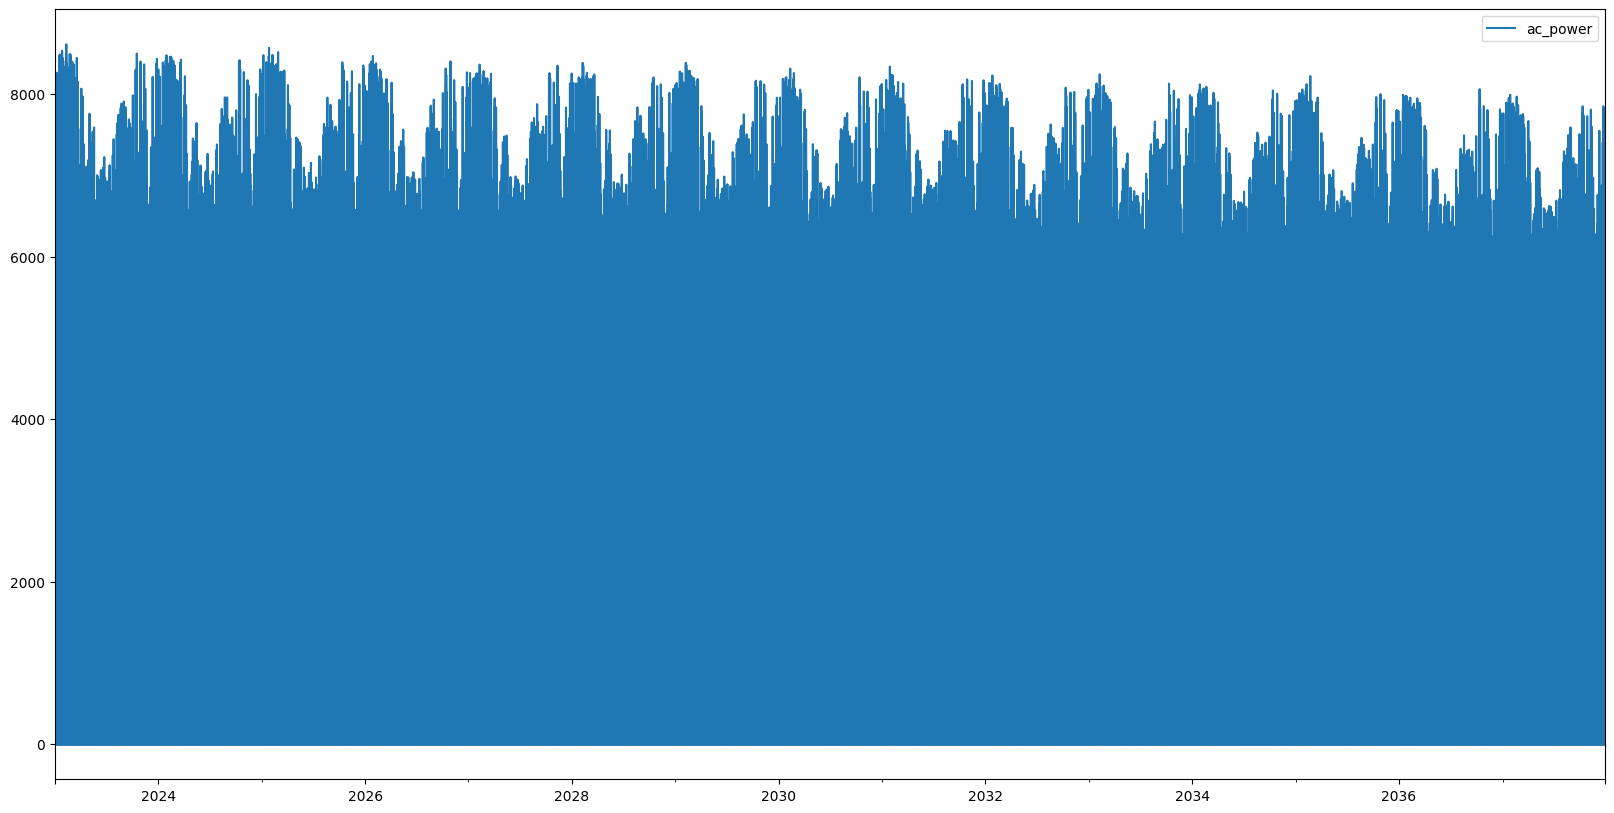

In [7]:
# Testing the processing of one data series

with open("data/pvwatts/raw/system_capacity10_module_type0_array_type0_tilt10.json") as f:
        hourly_data = json.load(f)["outputs"]["ac"]*15
        hourly_data = np.asarray(hourly_data)

        noise = np.random.normal(loc=1.0, scale=0.015, size=len(hourly_data))
        
        hourly_data = hourly_data * noise
        hourly_data = hourly_data * degradation_factor

df = pd.DataFrame(
        index = pd.date_range(start="01/01/2023", freq="H", periods=365*24*15, inclusive="both"),
        data={"ac_power" : hourly_data}
        ) 
    
df.plot(kind="line", figsize=(20,10))

In [15]:
 # Process all raw files and save the files in the interim folder

for path in raw_dir.iterdir():
    with open(path) as f:
        hourly_data = json.load(f)["outputs"]["ac"]*15
        hourly_data = np.asarray(hourly_data)
    
    noise = np.random.normal(loc=1.0, scale=0.015, size=len(hourly_data))
    
    hourly_data = hourly_data * noise
    hourly_data = hourly_data * degradation_factor
    
    file_name = "data/pvwatts/interim/" + path.stem
    np.save(file=file_name, arr=hourly_data)


In [ ]:
with open("data/pvwatts/interim/system_capacity10_module_type0_array_type0_tilt10.json") as f:
    

array([1., 2., 3., 4.])

<Axes: >

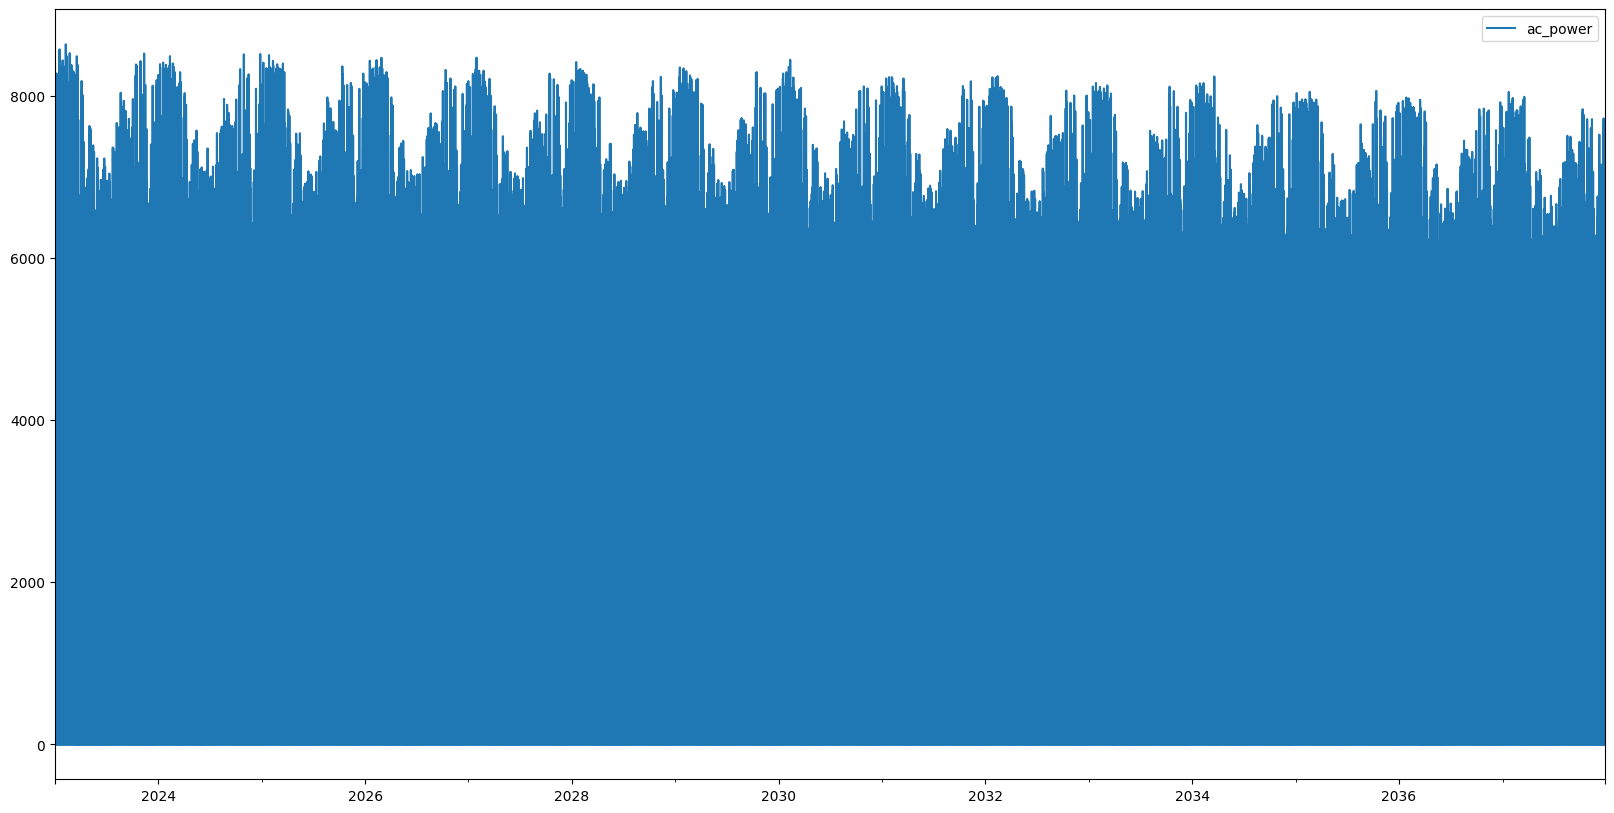

In [17]:
data = np.load("data/pvwatts/interim/system_capacity10_module_type0_array_type0_tilt10.npy")

df = pd.DataFrame(
        index = pd.date_range(start="01/01/2023", freq="H", periods=365*24*15, inclusive="both"),
        data={"ac_power" : data}
        ) 
    
df.plot(kind="line", figsize=(20,10))